## Survival Prediction For Members On-board the Titanic

#### Import Libraries and Dependicies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read Files

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Dataset Information

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train.drop(['Cabin','Ticket'], axis = 1, inplace = True)
test.drop(['Cabin', 'Ticket'], axis = 1, inplace = True)

#### Feature Engineering and Replacing Missing Values

In [11]:
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [12]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [13]:
train['Embarked'].isnull().sum()

0

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [15]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [16]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S


In [17]:
test['Fare'].mean()

35.627188489208635

In [18]:
test['Fare'] = test['Fare'].fillna(test.Fare.mean())

#### Extract Titles From Names
This can help generate more insight into the ages of individuals

In [19]:
train['Titles'] = train['Name'].str.extract('([A-Za-z]+)\.', expand = False)
test['Titles'] = test['Name'].str.extract('([A-Za-z]+)\.', expand = False)

In [20]:
train['Titles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [21]:
test['Titles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

##### Formatting Extracted titles

In [22]:
title_format = {'Mr': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Dr': 'Mr', 'Major': 'Mr', 'Capt': 'Mr', 'Col': 'Mr',
                'Mlle': 'Miss', 'Mme': 'Miss', 'Ms': 'Miss',
                'Lady': 'Mrs', 'Countess': 'Mrs',
                'Jonkheer': 'Other', 'Rev': 'Other', 'Dona': 'Other'
               }

In [23]:
train['Titles'] = train['Titles'].replace(title_format)

In [24]:
test['Titles'] = test['Titles'].replace(title_format)

In [25]:
train['Titles'].isnull().sum() , test['Titles'].isnull().sum()

(0, 0)

In [26]:
train['Titles'].value_counts()

Titles
Mr        531
Miss      186
Mrs       127
Master     40
Other       7
Name: count, dtype: int64

In [27]:
test['Titles'].value_counts()

Titles
Mr        243
Miss       79
Mrs        72
Master     21
Other       3
Name: count, dtype: int64

In [28]:
train.groupby('Titles')['Age'].mean()

Titles
Master     4.574167
Miss      21.860000
Mr        32.862530
Mrs       35.981818
Other     42.428571
Name: Age, dtype: float64

In [29]:
test.groupby('Titles')['Age'].mean()

Titles
Master     7.406471
Miss      21.774844
Mr        32.306452
Mrs       38.903226
Other     36.666667
Name: Age, dtype: float64

In [30]:
for i,data in enumerate(train['Age'].isnull()):
    if data == True:
        if train.loc[i,'Titles'] == 'Master':
           train.loc[i,'Age'] = 5
        elif train.loc[i,'Titles'] == 'Miss':
           train.loc[i,'Age'] = 22
        elif train.loc[i,'Titles'] == 'Mr':
           train.loc[i,'Age'] = 33
        elif train.loc[i,'Titles'] == 'Mrs':
           train.loc[i,'Age'] = 36 
        elif train.loc[i,'Titles'] == 'Other':
           train.loc[i,'Age'] = 42   

In [31]:
for i,data in enumerate(test['Age'].isnull()):
    if data == True:
        if test.loc[i,'Titles'] == 'Master':
           test.loc[i,'Age'] = 7
        elif test.loc[i,'Titles'] == 'Miss':
           test.loc[i,'Age'] = 22
        elif test.loc[i,'Titles'] == 'Mr':
           test.loc[i,'Age'] = 32
        elif test.loc[i,'Titles'] == 'Mrs':
           test.loc[i,'Age'] = 39
        elif test.loc[i,'Titles'] == 'Other':
           test.loc[i,'Age'] = 37

In [32]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Titles         0
dtype: int64

In [33]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Titles         0
dtype: int64

##### Create Age Groups

In [34]:
train['Age Range'] = 0
for i,data in enumerate(train['Age']):
    if data <=18 :
        train.loc[i,'Age Range'] = 0
    elif (data > 18)&(data <= 35):
        train.loc[i,'Age Range'] = 1
    elif (data > 35)&(data <= 45):
        train.loc[i,'Age Range'] = 2
    elif (data > 45)&(data <= 60):
        train.loc[i,'Age Range'] = 3
    elif data > 60:
        train.loc[i,'Age Range'] = 4

In [35]:
test['Age Range'] = 0
for i,data in enumerate(test['Age']):
    if data <=18 :
        test.loc[i,'Age Range'] = 0
    elif (data > 18)&(data <= 35):
        test.loc[i,'Age Range'] = 1
    elif (data > 35)&(data <= 45):
        test.loc[i,'Age Range'] = 2
    elif (data > 45)&(data <= 60):
        test.loc[i,'Age Range'] = 3
    elif data > 60:
        test.loc[i,'Age Range'] = 4

#### Exploratory Data Analysis

In [36]:
train.drop('PassengerId',inplace = True, axis = 1)

In [37]:
for data in train:
    print(f'Unique values of {data} are {train[data].nunique()} in number')

Unique values of Survived are 2 in number
Unique values of Pclass are 3 in number
Unique values of Name are 891 in number
Unique values of Sex are 2 in number
Unique values of Age are 88 in number
Unique values of SibSp are 7 in number
Unique values of Parch are 7 in number
Unique values of Fare are 248 in number
Unique values of Embarked are 3 in number
Unique values of Titles are 5 in number
Unique values of Age Range are 5 in number


In [38]:
cat_var = ['Pclass', 'Sex','SibSp','Parch','Embarked', 'Titles']

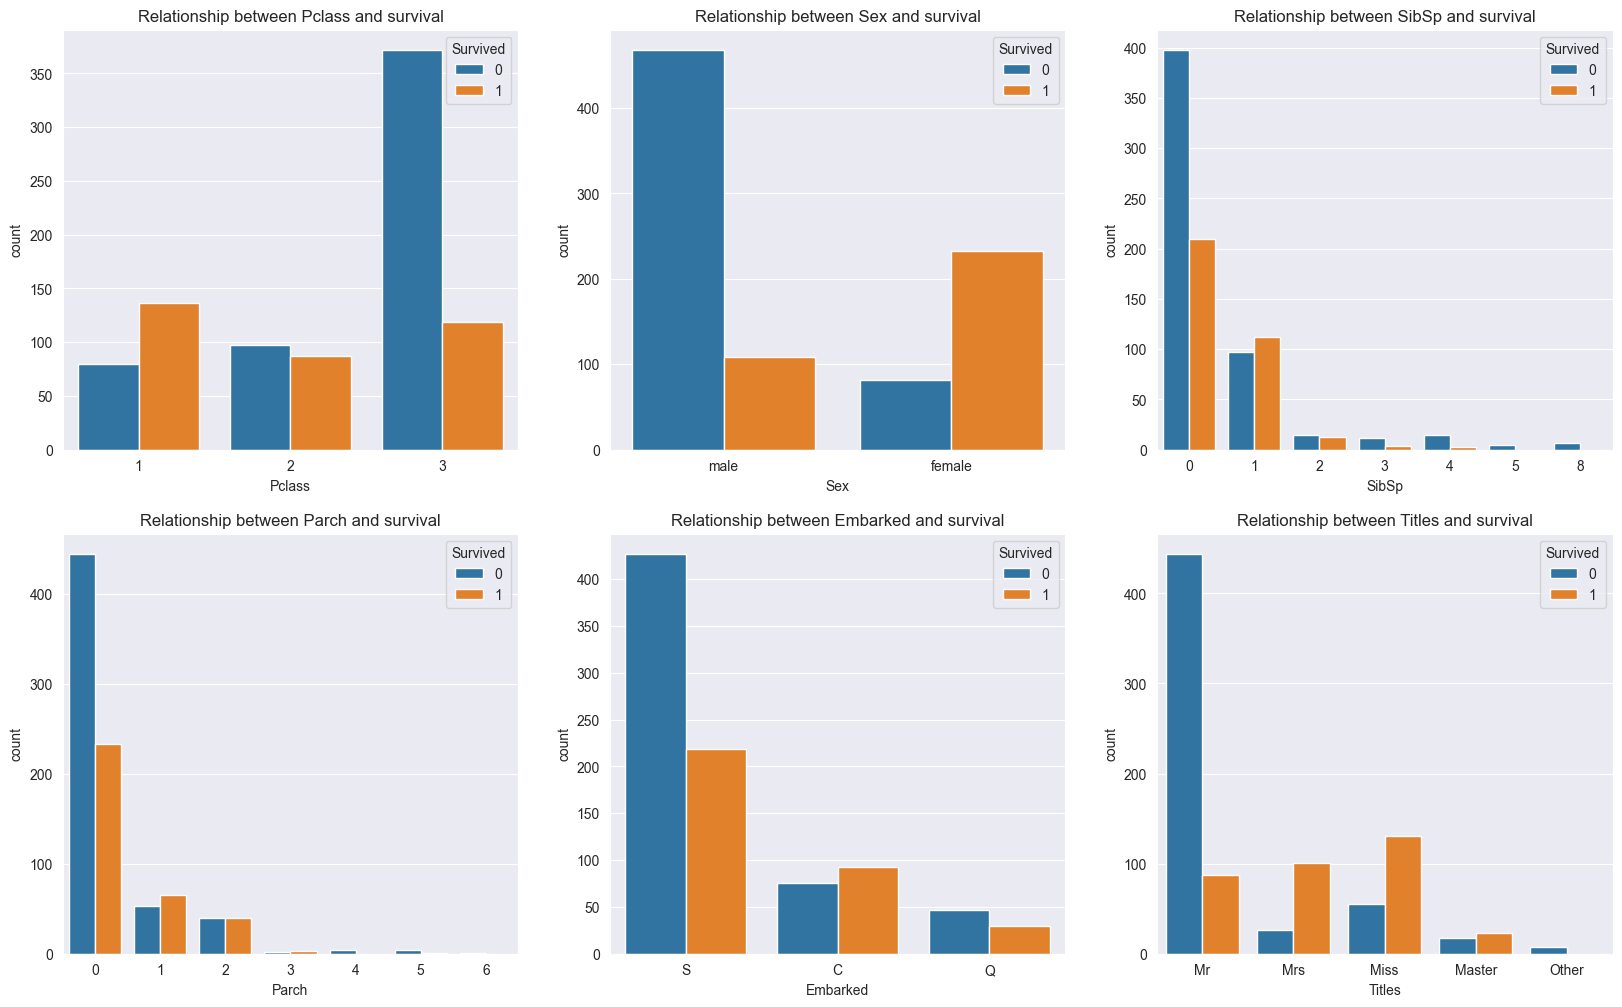

In [39]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,12))
c = 1
for col in cat_var:
    axis = f'ax{c}'
    axis = fig.add_subplot(2,3,c)
    sns.countplot(x = col, hue = 'Survived', data = train, ax = axis)
    plt.title(f'Relationship between {col} and survival')
    c+=1

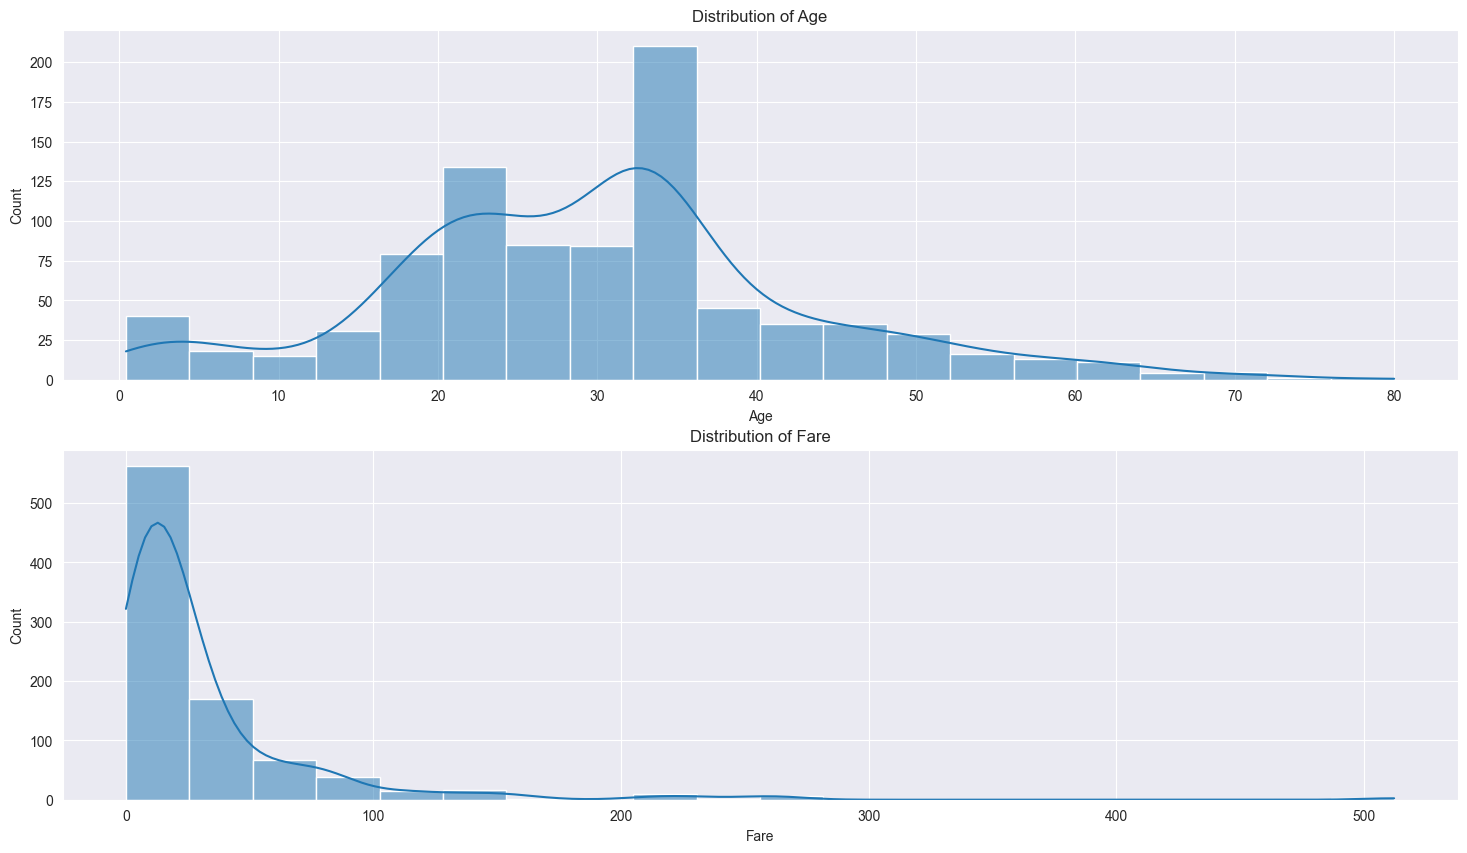

In [40]:
cont_var = ['Age', 'Fare']
fig = plt.figure(figsize = (18,10))
b = 1
for col in cont_var:
    axis = fig.add_subplot(2,1,b)
    sns.histplot(x = col, bins = 20, kde = True, data = train)
    plt.title(f'Distribution of {col}')
    b+=1

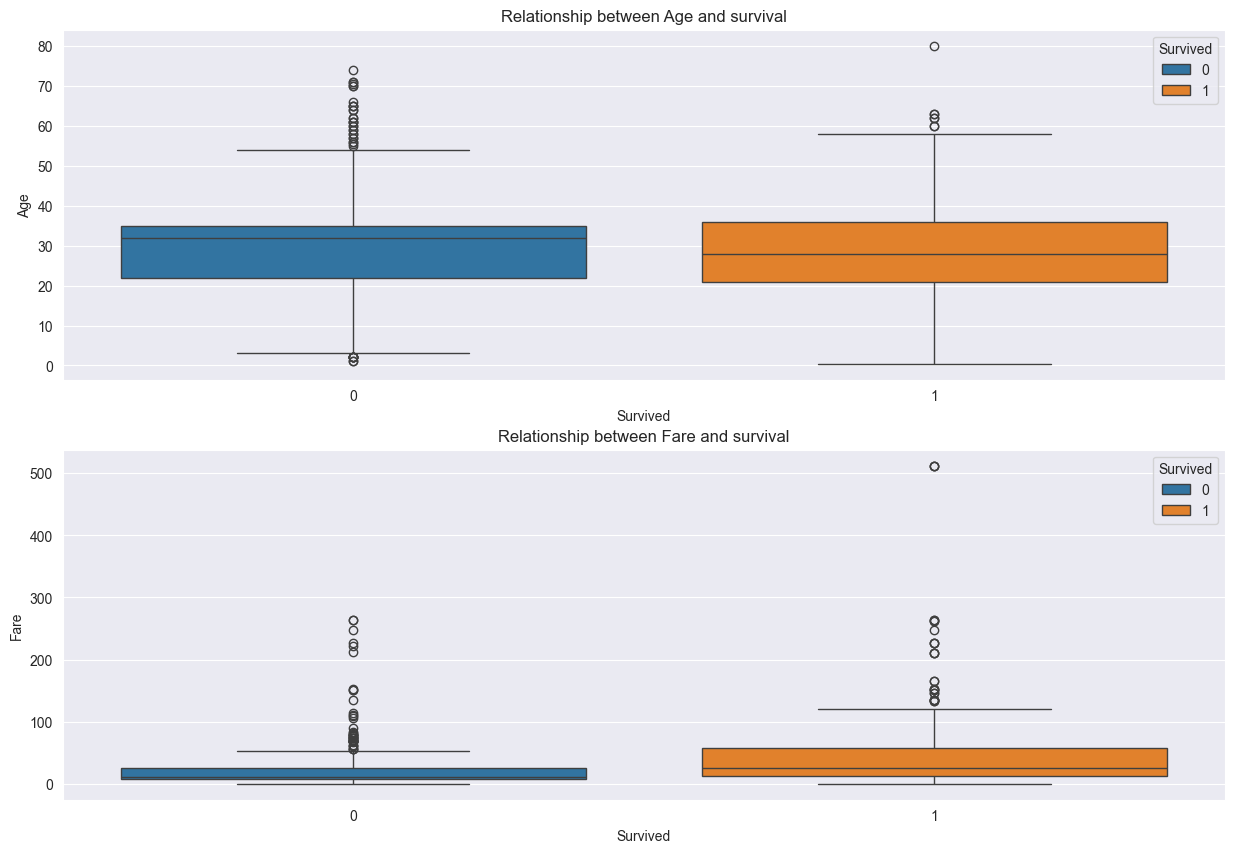

In [41]:
fig = plt.figure(figsize = (15,10))
b = 1
for col in cont_var:
    axis = fig.add_subplot(2,1,b)
    sns.boxplot(y = col, x = 'Survived', data = train, hue = 'Survived' )
    plt.title(f'Relationship between {col} and survival')
    b+=1

#### Correlation Matrix of Features

In [42]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Age Range
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_var:
    train[col] = le.fit_transform(train[col])

In [44]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Age Range
0,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,1
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,3,2
2,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,3,1
4,0,2,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,2,1


In [45]:
correlation_matrix = train.drop('Name', axis = 1).corr()
correlation_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Age Range
Survived,1.000000,-0.338481,-0.543351,-0.091497,-0.026385,0.081629,0.257307,-0.167675,-0.087787,-0.037663
Pclass,-0.338481,1.000000,0.131900,-0.339582,0.078141,0.018443,-0.549500,0.162098,-0.124756,-0.355302
Sex,-0.543351,0.131900,1.000000,0.120417,-0.123164,-0.245489,-0.182333,0.108262,0.047676,0.054316
Age,-0.091497,-0.339582,0.120417,1.000000,-0.286941,-0.198712,0.089087,-0.024008,0.511230,0.919899
SibSp,-0.026385,0.078141,-0.123164,-0.286941,1.000000,0.423338,0.163254,0.065635,-0.228201,-0.214533
Parch,0.081629,0.018443,-0.245489,-0.198712,0.423338,1.000000,0.216225,0.039798,-0.106481,-0.118069
Fare,0.257307,-0.549500,-0.182333,0.089087,0.163254,0.216225,1.000000,-0.224719,-0.028680,0.105019
Embarked,-0.167675,0.162098,0.108262,-0.024008,0.065635,0.039798,-0.224719,1.000000,0.030932,-0.013789
Titles,-0.087787,-0.124756,0.047676,0.511230,-0.228201,-0.106481,-0.028680,0.030932,1.000000,0.409111
Age Range,-0.037663,-0.355302,0.054316,0.919899,-0.214533,-0.118069,0.105019,-0.013789,0.409111,1.000000


<Axes: >

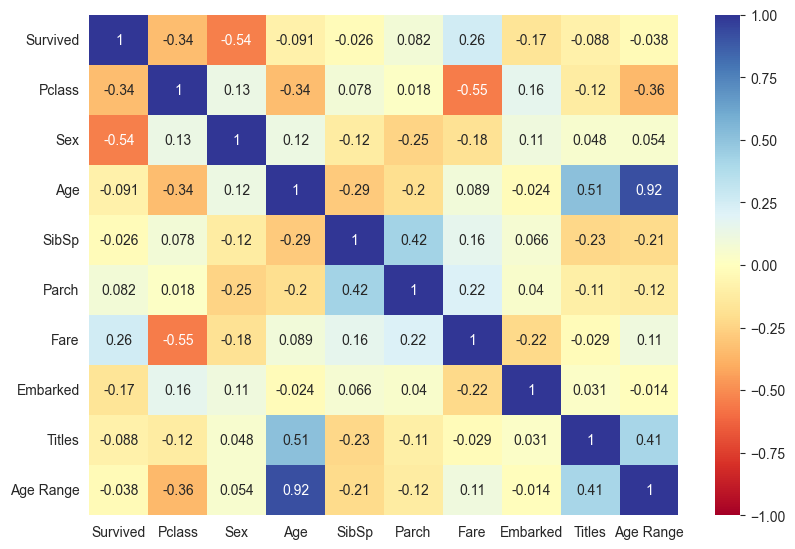

In [46]:
plt.figure(figsize = (9.5,6.5))
sns.heatmap(correlation_matrix, cmap = 'RdYlBu', annot = True, vmin=-1, vmax=1)

In [47]:
correlation_matrix['Survived'].abs().sort_values(ascending = True)

SibSp        0.026385
Age Range    0.037663
Parch        0.081629
Titles       0.087787
Age          0.091497
Embarked     0.167675
Fare         0.257307
Pclass       0.338481
Sex          0.543351
Survived     1.000000
Name: Survived, dtype: float64

#### More Feature Engineering

In [48]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Age Range
0,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,1
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,3,2
2,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,3,1
4,0,2,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,2,1


In [49]:
train['Fam Size'] = train['SibSp'] + train['Parch']
test['Fam Size'] = test['SibSp'] + test['Parch']

In [50]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Age Range,Fam Size
0,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,1,1
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,3,2,1
2,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1,0
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,3,1,1
4,0,2,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,2,1,0


In [51]:
train['Fam Size'].value_counts()

Fam Size
0    537
1    161
2    102
3     29
5     22
4     15
6     12
8      7
7      6
Name: count, dtype: int64

In [52]:
test['Fam Size'].value_counts()

Fam Size
0     253
1      74
2      57
3      14
4       7
6       4
10      4
5       3
7       2
Name: count, dtype: int64

In [53]:
train.drop('Name', axis = 1, inplace = True)

In [54]:
corr = train.corr()

<Axes: >

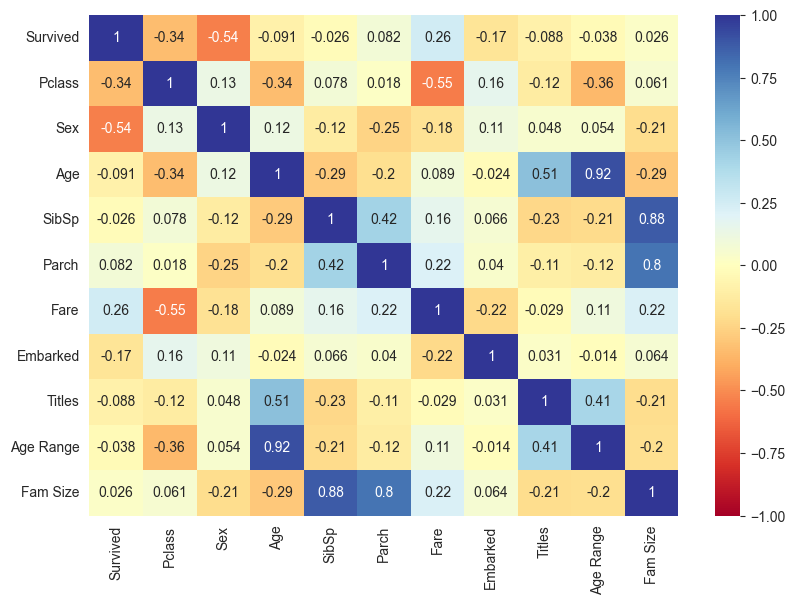

In [55]:
plt.figure(figsize = (9.5,6.5))
sns.heatmap(corr, cmap = 'RdYlBu', annot = True, vmin=-1, vmax=1)

In [56]:
corr['Survived'].abs().sort_values(ascending = True)

Fam Size     0.025616
SibSp        0.026385
Age Range    0.037663
Parch        0.081629
Titles       0.087787
Age          0.091497
Embarked     0.167675
Fare         0.257307
Pclass       0.338481
Sex          0.543351
Survived     1.000000
Name: Survived, dtype: float64

#### Prediction Modelling

In [57]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [58]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Age Range,Fam Size
0,0,2,1,22.0,1,0,7.2500,2,2,1,1
1,1,0,0,38.0,1,0,71.2833,0,3,2,1
2,1,2,0,26.0,0,0,7.9250,2,1,1,0
3,1,0,0,35.0,1,0,53.1000,2,3,1,1
4,0,2,1,35.0,0,0,8.0500,2,2,1,0


In [59]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Age Range,Fam Size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs,3,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr,4,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs,1,2


In [60]:
test.drop('Name', axis = 1, inplace = True)

In [61]:
for col in cat_var:
    test[col] = le.fit_transform(test[col])

In [62]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Age Range,Fam Size
0,892,2,1,34.5,0,0,7.8292,1,2,1,0
1,893,2,0,47.0,1,0,7.0000,2,3,3,1
2,894,1,1,62.0,0,0,9.6875,1,2,4,0
3,895,2,1,27.0,0,0,8.6625,2,2,1,0
4,896,2,0,22.0,1,1,12.2875,2,3,1,2


In [63]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Age Range,Fam Size
0,0,2,1,22.0,1,0,7.2500,2,2,1,1
1,1,0,0,38.0,1,0,71.2833,0,3,2,1
2,1,2,0,26.0,0,0,7.9250,2,1,1,0
3,1,0,0,35.0,1,0,53.1000,2,3,1,1
4,0,2,1,35.0,0,0,8.0500,2,2,1,0


In [64]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [65]:
std_sclr = StandardScaler()
cols = ['Pclass','Age','SibSp','Fare', 'Age Range', 'Fam Size', 'Titles']
X[cols] = std_sclr.fit_transform(X[cols])

In [66]:
## standardized set
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Age Range,Fam Size
0,0.827377,1,-0.590771,0.490044,0,-0.502445,2,0.190454,-0.265359,0.072548
1,-1.566107,0,0.614586,0.490044,0,0.786845,0,1.548007,0.829248,0.072548
2,0.827377,0,-0.289432,-0.504555,0,-0.488854,2,-1.167100,-0.265359,-0.580381
3,-1.566107,0,0.388582,0.490044,0,0.420730,2,1.548007,-0.265359,0.072548
4,0.827377,1,0.388582,-0.504555,0,-0.486337,2,0.190454,-0.265359,-0.580381
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,1,-0.214097,-0.504555,0,-0.386671,2,2.905561,-0.265359,-0.580381
887,-1.566107,0,-0.816776,-0.504555,0,-0.044381,2,-1.167100,-0.265359,-0.580381
888,0.827377,0,-0.590771,0.490044,2,-0.176263,2,-1.167100,-0.265359,1.378405
889,-1.566107,1,-0.289432,-0.504555,0,-0.044381,0,0.190454,-0.265359,-0.580381


In [67]:
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=10)

#### Random Forests

In [68]:
model = RandomForestClassifier(random_state = 42)
params = {
    'n_estimators':[50,100,200],
    'max_depth':[None,5,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [69]:
gs = GridSearchCV(model,params,cv = 5, scoring = 'f1', n_jobs = -1)

In [70]:
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [71]:
gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [72]:
gs.best_score_

0.7740590148367411

In [73]:
pred = gs.best_estimator_.predict(x_test)

In [74]:
jaccard_score(y_test,pred), accuracy_score(y_test,pred), f1_score(y_test,pred)

(0.6447368421052632, 0.8491620111731844, 0.784)

#### Logistic Regresssion

In [75]:
model2 = LogisticRegression()
params2 = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
gs2 = GridSearchCV(model2,params2,cv = 5, scoring = 'f1', n_jobs = -1)

In [76]:
gs2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='f1')

In [77]:
gs2.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [78]:
gs2.best_score_

0.7242963351701216

In [79]:
pred = gs2.best_estimator_.predict(x_test)

In [80]:
jaccard_score(y_test,pred), accuracy_score(y_test,pred), f1_score(y_test,pred)

(0.5844155844155844, 0.8212290502793296, 0.7377049180327869)

#### Decision Trees

In [81]:
model3 = DTC()
params3 = {
    'criterion': ['gini', 'entropy'],  
    'splitter': ['best', 'random'], 
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],  
    'min_samples_leaf': [1, 2, 5, 10],  
    'max_features': [None, 'sqrt', 'log2'], 
    'max_leaf_nodes': [None, 10, 20, 30], 
}

In [82]:
gs3 = GridSearchCV(model3,params3,cv = 5, scoring = 'f1', n_jobs = -1)

In [83]:
gs3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [84]:
gs3.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'log2',
 'max_leaf_nodes': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [85]:
gs3.best_score_

0.7742439711653566

In [86]:
pred = gs3.best_estimator_.predict(x_test)

In [87]:
jaccard_score(y_test,pred), accuracy_score(y_test,pred), f1_score(y_test,pred)

(0.6447368421052632, 0.8491620111731844, 0.784)

#### K-Nearest Neighbour

In [88]:
model4 = KNeighborsClassifier()
params4= {
    'n_neighbors': [3, 5, 7, 9, 11],    
    'weights': ['uniform', 'distance'],    
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'p': [1, 2] 
}

In [89]:
gs4 = GridSearchCV(model4,params4,cv = 5, scoring = 'f1', n_jobs = -1)

In [90]:
gs4.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [91]:
gs4.best_params_

{'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

In [92]:
gs4.best_score_

0.7369266239292394

In [93]:
pred = gs4.best_estimator_.predict(x_test)

In [94]:
jaccard_score(y_test,pred), accuracy_score(y_test,pred), f1_score(y_test,pred)

(0.64, 0.8491620111731844, 0.7804878048780488)

#### Support Vector Machine(SVM)

In [95]:
model5 = SVC()
params5 = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.001, 0.01, 0.1, 1],
}

In [97]:
rs5 = RandomizedSearchCV(model5,params5,cv = 5, scoring = 'f1', n_jobs = -1, n_iter = 15)

In [98]:
rs5.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   scoring='f1')

In [99]:
rs5.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}

In [100]:
rs5.best_score_

0.7705211043068061

In [101]:
pred = rs5.best_estimator_.predict(x_test)

In [102]:
jaccard_score(y_test,pred), accuracy_score(y_test,pred), f1_score(y_test,pred)

(0.6486486486486487, 0.8547486033519553, 0.7868852459016393)

The Support Vector model evidently performs best, but all perform considerably good in general

#### Test Set Predictions

In [104]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Age Range,Fam Size
0,892,2,1,34.5,0,0,7.8292,1,2,1,0
1,893,2,0,47.0,1,0,7.0000,2,3,3,1
2,894,1,1,62.0,0,0,9.6875,1,2,4,0
3,895,2,1,27.0,0,0,8.6625,2,2,1,0
4,896,2,0,22.0,1,1,12.2875,2,3,1,2


In [105]:
x_t = test.drop('PassengerId', axis = 1)

In [106]:
cols = ['Pclass','Age','SibSp','Fare', 'Age Range', 'Fam Size', 'Titles']
x_t[cols] = std_sclr.fit_transform(x_t[cols])

In [107]:
x_t.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Age Range,Fam Size
0,0.873482,1,0.330862,-0.532181,0,-0.498407,1,0.135038,-0.313934,-0.553443
1,0.873482,0,1.292083,0.683402,0,-0.513274,2,1.447733,1.873139,0.105643
2,-0.315819,1,2.445548,-0.532181,0,-0.465088,1,0.135038,2.966676,-0.553443
3,0.873482,1,-0.245870,-0.532181,0,-0.483466,2,0.135038,-0.313934,-0.553443
4,0.873482,0,-0.630358,0.683402,1,-0.418471,2,1.447733,-0.313934,0.764728


#### Class Voting

In [122]:
final_pred1 = gs.best_estimator_.predict(x_t)
final_pred2 = gs2.best_estimator_.predict(x_t)
final_pred3 = gs3.best_estimator_.predict(x_t)
final_pred4 = gs4.best_estimator_.predict(x_t)
final_pred5 = rs5.best_estimator_.predict(x_t)

In [137]:
predictions = [final_pred1,final_pred2,final_pred3,final_pred4,final_pred5]

In [129]:
from scipy.stats import mode
voted_predictions = mode(predictions, axis=0)[0]

In [130]:
voted_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [138]:
test['Survived'] = final_pred1

In [139]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Age Range,Fam Size,Survived
0,892,2,1,34.5,0,0,7.8292,1,2,1,0,0
1,893,2,0,47.0,1,0,7.0000,2,3,3,1,0
2,894,1,1,62.0,0,0,9.6875,1,2,4,0,0
3,895,2,1,27.0,0,0,8.6625,2,2,1,0,0
4,896,2,0,22.0,1,1,12.2875,2,3,1,2,1


In [140]:
submission_set = test[['PassengerId','Survived']]

In [141]:
submission_set

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [142]:
submission_set.to_csv( 'submission_set.csv', index = None)

In [143]:
submission_set.Survived.value_counts()

Survived
0    264
1    154
Name: count, dtype: int64